In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("dispatch_data_updated.csv")

In [19]:
df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'], format='%Y-%m-%d %H:%M:%S' )
df.set_index('INCIDENT_DATETIME', inplace=True)
daily_incidents = df.resample('D').size()

In [20]:
daily_incidents = df.resample('D').size()

In [21]:
daily_incidents = daily_incidents.fillna(0)
decomposition = seasonal_decompose(daily_incidents, model='additive')
model = ARIMA(daily_incidents, order=(5,1,0))
results = model.fit()
forecast = results.forecast(steps=30)
result = adfuller(daily_incidents)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

model = ARIMA(daily_incidents, order=(5, 0, 2))
model_fit = model.fit()

# Summary
print(model_fit.summary())

ADF Statistic: -6.66515772409118
p-value: 4.738002083549493e-09
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 7216
Model:                 ARIMA(5, 0, 2)   Log Likelihood              -19975.331
Date:                Tue, 17 Dec 2024   AIC                          39968.663
Time:                        05:28:32   BIC                          40030.619
Sample:                    01-01-2005   HQIC                         39989.979
                         - 10-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5552      0.677     20.008      0.000      12.227      14.883
ar.L1          0.0592      0.483      0.123      0.902      -0.887 

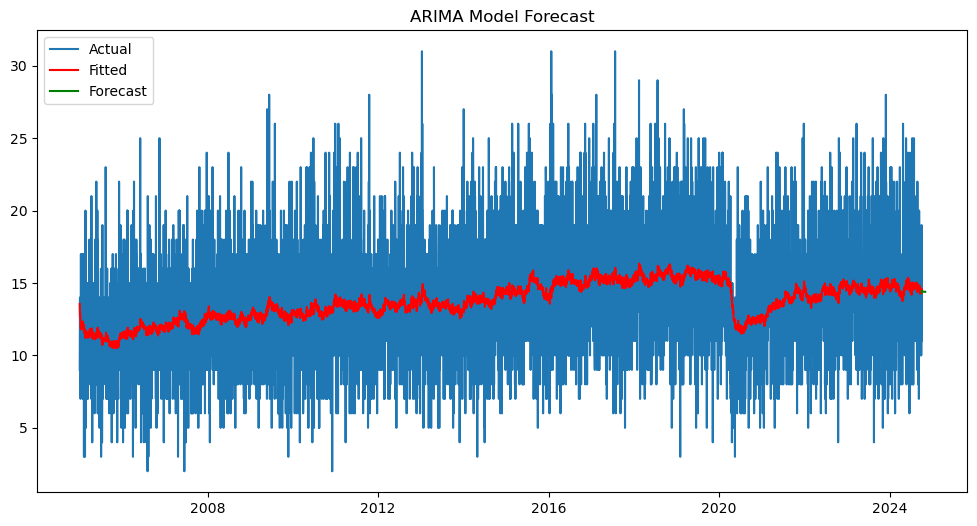

In [22]:
in_sample_pred = model_fit.predict(start=0, end=len(daily_incidents) - 1)

forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(daily_incidents, label="Actual")
plt.plot(in_sample_pred, label="Fitted", color='red')
plt.plot(pd.date_range(daily_incidents.index[-1], periods=forecast_steps, freq='D'),
         forecast, label="Forecast", color='green')
plt.legend()
plt.title("ARIMA Model Forecast")
plt.show()